<a href="https://colab.research.google.com/github/LomaxOS/AI-Assignments/blob/main/Lomax_DataDrivenModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stage 1**
---
## **Selected Datasets and the Model**
---

**First Dataset**: A laptop specs dataset from the link below. It contains different specifications of more than 500 laptops.

**URL Link**: https://www.kaggle.com/datasets/kuchhbhi/latest-laptop-price-list

**Second Dataset**: The CPU and GPU specs dataset from the link below is selected to be linked with the laptop dataset.

**URL Link**: https://www.kaggle.com/datasets/michaelbryantds/cpu-and-gpu-product-data

**Model**: Linear Regression was selected to model and predict factors that affect laptop prices."


---




# **Stage 2**

Objective: The purpose of this project is to examine a variety of laptops to understand how their prices are affected by the attributes of their processors, with a specific focus on frequencies. The laptop dataset includes various processors but lacks detailed specifications. Therefore, the processor frequencies are retrieved from the CPU and GPU specs dataset. This additional data enables the model to predict how the frequencies of specific processors affect laptop prices.


# **Stage 3**

Data Inspection and Cleaning.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
laptop_data = pd.read_csv("/content/Cleaned_Laptop_data.csv")
chip_data = pd.read_csv("/content/chip_dataset.csv")

In [ ]:
laptop_data.head()

In [ ]:
chip_data.head()

In [ ]:
#Display the structure of the laptop dataset
print(laptop_data.info())

In [ ]:
#Display the structure of the chip dataset
print(chip_data .info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   int64  
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 531.0+ 

In [ ]:
#In the laptop_data, processor_brand is selected as input, with the focus on AMD brand
#laptop_processors = laptop_data[laptop_data['processor_brand'].str.contains(r'^\s*AMD', case=False, na=False)]

In [ ]:
#laptop_processors

In [ ]:
#laptop dataset - Dropping the processor_name in the laptop_data in order to replace it with Product column of chip_data
laptop_data = laptop_data.drop('processor_name', axis=1)
laptop_data.head()

,brand,model,processor_brand,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,64-bit,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,64-bit,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [ ]:
#Chip dataset - In the processor_data, Product is selected as input, with the focus on AMD or Intel CPU product
amd_intel_processors = chip_data[
    (chip_data['Product'].str.contains(r'^\s*AMD', case=False, na=False)) | (chip_data['Product'].str.contains(r'^\s*Intel', case=False, na=False)) &
    (chip_data['Type'] == 'CPU')
]

In [ ]:
amd_intel_processors.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,20/02/2007,65.0,45.0,77.0,122.0,2200,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,06/09/2018,14.0,35.0,192.0,4800.0,3200,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,02/09/2020,10.0,28.0,NaN,NaN,2600,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,01/09/2013,22.0,80.0,160.0,1400.0,1800,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,03/05/2011,45.0,125.0,258.0,758.0,3700,Unknown,AMD,NaN,NaN,NaN


In [ ]:
#Extract from chip_data for a simpler matchin
#chip_data['processor_brand'] = chip_data['Product'].apply(lambda x: 'AMD' if 'AMD' in x else ('Intel' if 'Intel' in x else 'Other'))

In [ ]:
#chip_data.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,20/02/2007,65.0,45.0,77.0,122.0,2200,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,06/09/2018,14.0,35.0,192.0,4800.0,3200,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,02/09/2020,10.0,28.0,NaN,NaN,2600,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,01/09/2013,22.0,80.0,160.0,1400.0,1800,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,03/05/2011,45.0,125.0,258.0,758.0,3700,Unknown,AMD,NaN,NaN,NaN


In [ ]:
#display statistics
print(laptop_data.describe())

       graphic_card_gb    warranty   latest_price      old_price    discount  \
count       896.000000  896.000000     896.000000     896.000000  896.000000   
mean          1.198661    0.691964   76309.860491   88134.154018   18.527902   
std           2.057454    0.606282   46613.354368   55719.645554   10.508486   
min           0.000000    0.000000   13990.000000       0.000000    0.000000   
25%           0.000000    0.000000   45490.000000   54940.500000   11.000000   
50%           0.000000    1.000000   63494.000000   78052.500000   19.000000   
75%           2.000000    1.000000   89090.000000  111019.500000   26.000000   
max           8.000000    3.000000  441990.000000  377798.000000   57.000000   

       star_rating       ratings      reviews  
count   896.000000    896.000000   896.000000  
mean      2.980469    367.391741    46.152902  
std       1.965254   1106.309355   136.079586  
min       0.000000      0.000000     0.000000  
25%       0.000000      0.000000     0.

In [ ]:
#display statistics
print(chip_data.describe())

        Unnamed: 0  Process Size (nm)      TDP (W)  Die Size (mm^2)  \
count  4854.000000        4845.000000  4228.000000      4139.000000   
mean   2426.500000          55.109598    81.359981       188.440445   
std    1401.373433          44.998676    76.807808       126.189383   
min       0.000000           0.000000     1.000000         1.000000   
25%    1213.250000          22.000000    33.000000       104.000000   
50%    2426.500000          40.000000    65.000000       148.000000   
75%    3639.750000          90.000000   100.000000       239.000000   
max    4853.000000         250.000000   900.000000       826.000000   

       Transistors (million)   Freq (MHz)    FP16 GFLOPS   FP32 GFLOPS  \
count            4143.000000  4854.000000     536.000000   1948.000000   
mean             1929.922279  1484.406057    8397.459851   2134.756653   
std              4044.891098  1066.701523   13799.551131   3898.431487   
min                 8.000000   100.000000      10.020000     12.

In [ ]:
# laptop dataset - counting number missing values of each attribute
print(laptop_data.isnull().sum())

brand              0
model              0
processor_brand    0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64


In [ ]:
# amd_intel_processors dataset - counting number missing values of each attribute to see if the Freq (MHz) need more works
print(amd_intel_processors.isnull().sum())

Unnamed: 0                  0
Product                     0
Type                        0
Release Date                0
Process Size (nm)           0
TDP (W)                   120
Die Size (mm^2)           537
Transistors (million)     529
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              2643
FP32 GFLOPS              2193
FP64 GFLOPS              2400
dtype: int64


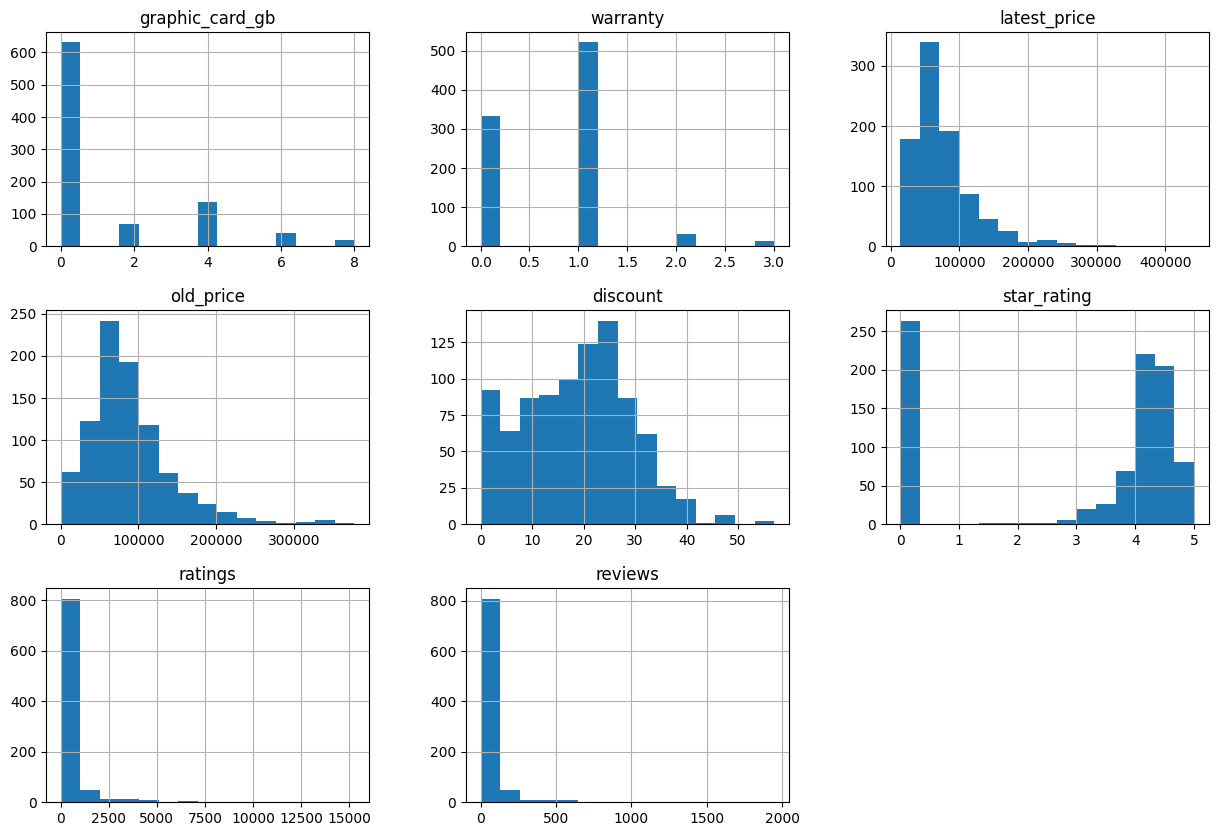

In [ ]:
#Plotting histograms for all numeric columns in the laptop dataset to visualise the prices
laptop_data.hist(bins=15, figsize=(15, 10))
plt.show()

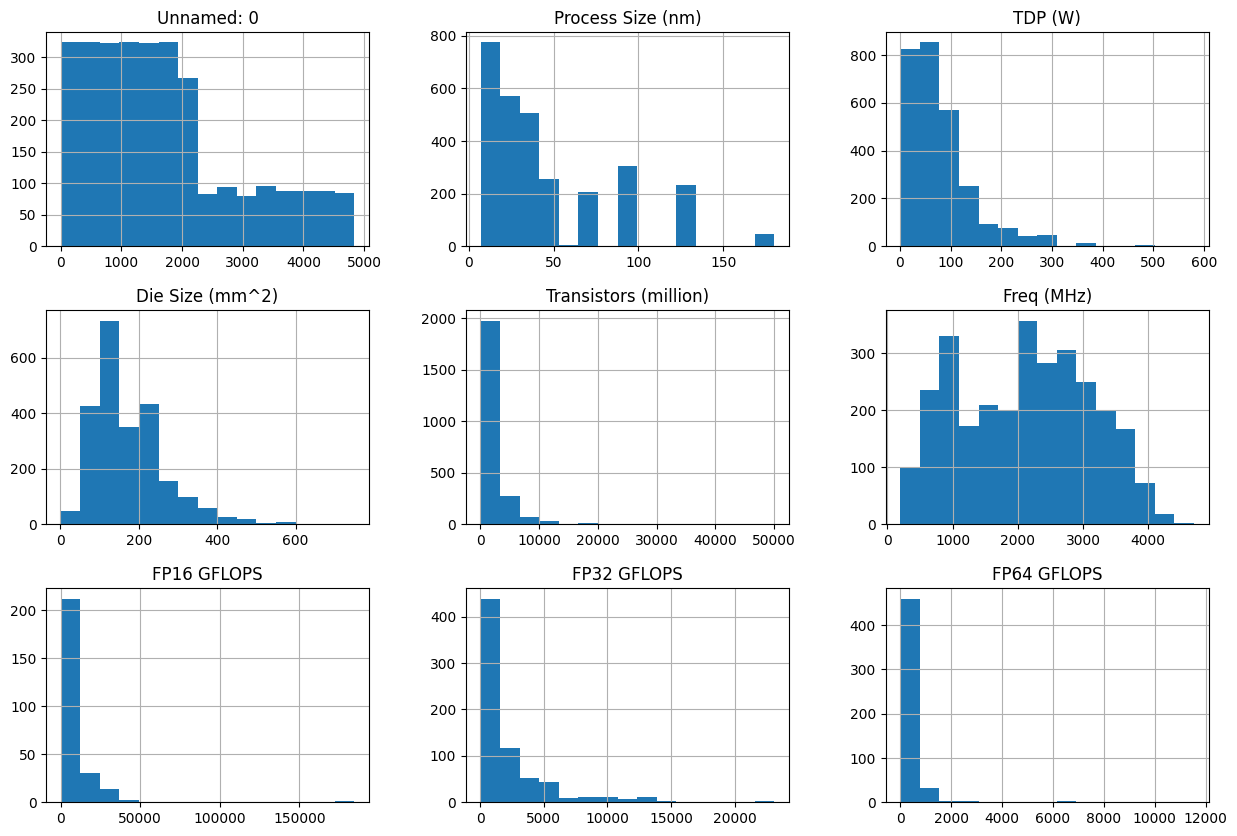

In [ ]:
#plotting histograms for all numeric columns in chip dataset to visualise the frequencies
amd_intel_processors.hist(bins=15, figsize=(15, 10))
plt.show()

In [ ]:
#Preparation for linking - extracting both AMD and Intel from processor_brand and Product column using regex
laptop_data['key'] = laptop_data['processor_brand'].str.extract('(AMD|Intel)')

<ipython-input-145-68b5b078069a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amd_intel_processors.loc[:,'key'] = amd_intel_processors['Product'].str.extract('(AMD|Intel)')


In [ ]:
#Preparation for linking - extracting both AMD and Intel from the Product column using regex
amd_intel_processors.loc[:,'key'] = amd_intel_processors['Product'].str.extract('(AMD|Intel)')

Linking the datasets

In [ ]:
# Merge based on key, which are processor_brand and Product
merged_data = pd.merge(laptop_data, amd_intel_processors, on='key', how='left')

In [ ]:
merged_data.head()

,brand,model,processor_brand,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,...,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,Lenovo,A6-9225,AMD,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,...,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,Lenovo,A6-9225,AMD,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,...,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Lenovo,A6-9225,AMD,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,...,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
3,Lenovo,A6-9225,AMD,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,...,65.0,125.0,285.0,450.0,2400.0,Unknown,AMD,NaN,NaN,NaN
4,Lenovo,A6-9225,AMD,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,...,90.0,89.0,156.0,154.0,2200.0,Unknown,AMD,NaN,NaN,NaN


In [ ]:
#Several missing values after merging
print(merged_data.isna().sum())

brand                          0
model                          0
processor_brand                0
processor_gnrtn                0
ram_gb                         0
ram_type                       0
ssd                            0
hdd                            0
os                             0
os_bit                         0
graphic_card_gb                0
weight                         0
display_size                   0
warranty                       0
Touchscreen                    0
msoffice                       0
latest_price                   0
old_price                      0
discount                       0
star_rating                    0
ratings                        0
reviews                        0
key                           28
Unnamed: 0                    28
Product                       28
Type                          28
Release Date                  28
Process Size (nm)             28
TDP (W)                    24988
Die Size (mm^2)           273992
Transistor

In [ ]:
#After merging, there are a significant number of NaN values, so I drop columns with a high percentage - threshold of 90%.
threshold = int(0.9 * len(merged_data))
merged_data.dropna(thresh=threshold, axis=1, inplace=True)

In [ ]:
print(merged_data.isna().sum())

brand                    0
model                    0
processor_brand          0
processor_gnrtn          0
ram_gb                   0
ram_type                 0
ssd                      0
hdd                      0
os                       0
os_bit                   0
graphic_card_gb          0
weight                   0
display_size             0
warranty                 0
Touchscreen              0
msoffice                 0
latest_price             0
old_price                0
discount                 0
star_rating              0
ratings                  0
reviews                  0
key                     28
Unnamed: 0              28
Product                 28
Type                    28
Release Date            28
Process Size (nm)       28
TDP (W)              24988
Freq (MHz)              28
Foundry                 28
Vendor                  28
dtype: int64


In [ ]:
merged_data.head()

In [ ]:
#No need for the TDP (W) - I drop its column in order to delete all 28 rows with NaN on the merged_data
merged_data = merged_data.drop('TDP (W)',axis=1)

In [ ]:
#No need of the key column, as its values are similar to the processor_brand
merged_data = merged_data.drop('key',axis=1)

In [ ]:
print(merged_data.isna().sum())

brand                 0
model                 0
processor_brand       0
processor_gnrtn       0
ram_gb                0
ram_type              0
ssd                   0
hdd                   0
os                    0
os_bit                0
graphic_card_gb       0
weight                0
display_size          0
warranty              0
Touchscreen           0
msoffice              0
latest_price          0
old_price             0
discount              0
star_rating           0
ratings               0
reviews               0
Unnamed: 0           28
Product              28
Type                 28
Release Date         28
Process Size (nm)    28
Freq (MHz)           28
Foundry              28
Vendor               28
dtype: int64


In [ ]:
#As the frequence is the most important column and still contains NaN values, I drop all 28 rows with NaN values
merged_data.dropna(inplace=True)

In [ ]:
#The data is ready for the next phase
print(merged_data.isna().sum())

brand                0
model                0
processor_brand      0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
display_size         0
warranty             0
Touchscreen          0
msoffice             0
latest_price         0
old_price            0
discount             0
star_rating          0
ratings              0
reviews              0
Unnamed: 0           0
Product              0
Type                 0
Release Date         0
Process Size (nm)    0
Freq (MHz)           0
Foundry              0
Vendor               0
dtype: int64


In [ ]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1165000 entries, 0 to 1165027
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   brand              1165000 non-null  object 
 1   model              1165000 non-null  object 
 2   processor_brand    1165000 non-null  object 
 3   processor_gnrtn    1165000 non-null  object 
 4   ram_gb             1165000 non-null  object 
 5   ram_type           1165000 non-null  object 
 6   ssd                1165000 non-null  object 
 7   hdd                1165000 non-null  object 
 8   os                 1165000 non-null  object 
 9   os_bit             1165000 non-null  object 
 10  graphic_card_gb    1165000 non-null  int64  
 11  weight             1165000 non-null  object 
 12  display_size       1165000 non-null  object 
 13  warranty           1165000 non-null  int64  
 14  Touchscreen        1165000 non-null  object 
 15  msoffice           1165000 non-null  

# **Stage 4**
Choose and train Estimator.

In [ ]:
#Now that the data is cleaned and merged, I am proceeding with setting up and training using the linear regression model.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = merged_data[['Freq (MHz)']]  #independent
y = merged_data['latest_price'] #dependent

#Split into training and testing
X_train, X_test, Y_train,Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
#Fitting the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Predicting
Y_pred = model.predict(X_test)


In [ ]:
Y_pred

array([75179.94389167, 74760.82431934, 73693.97449888, ...,
       74646.51898144, 74074.9922919 , 73922.58517469])

# **Stage 5**
Evaluate your model and revisit 4...repeat..

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Evaluating the model
#r_sq = model.score(x, y)
#print(f"coefficient of determination: {r_sq}")
#This high value might be due to outliers, a poor model fit

In [ ]:
#MSE - The lower the result, the accurate the prediction
#Measuring the average squared difference between the actual prices and the predicted prices.
mse = mean_squared_error(Y_test, Y_pred)

#No very accurate because the value of MSE is too high. This might be due to outliers, the way the model is fit, or the fact I chose frequency for prediction.
print("Mean squared error:", mse)


Mean squared error: 1920365955.7330196


In [ ]:
#R2_score - Understand if frequency variable is a strong predictor of laptop prices
r2 = r2_score(Y_test, Y_pred)

#R2_score value is close to 0, which indicates that the model covers nearly none of the differences in laptop prices.
print("R-squared score:", r2)

R-squared score: 8.767925567554347e-05


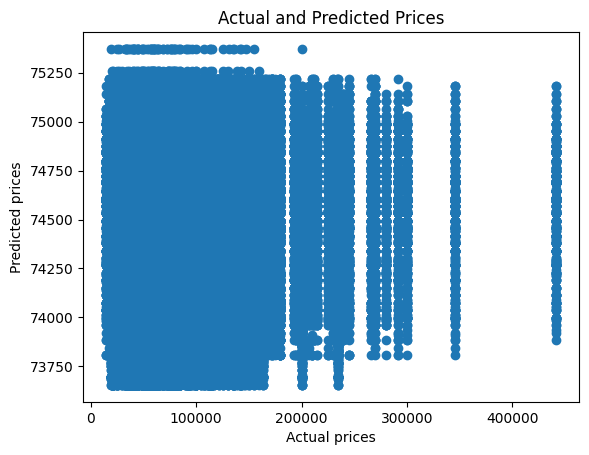

In [ ]:
#Visualising actual vs predicted prices to assess the performance
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual and Predicted Prices')
plt.show()

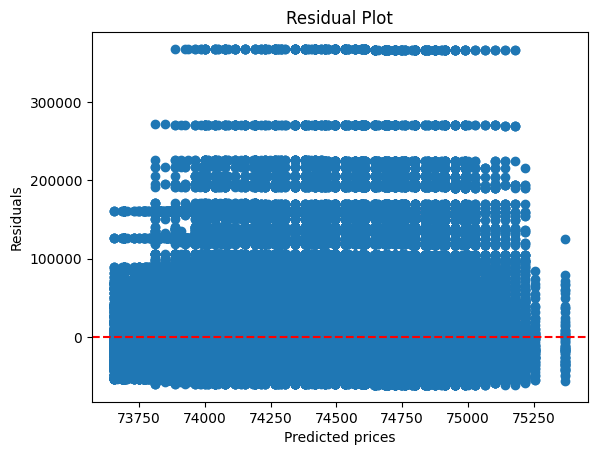

In [ ]:
#calculate residuals
residuals = Y_test - Y_pred

#observing from the residuals plot
plt.scatter(Y_pred,residuals)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

#The plot shows that the residuals are not randomly distributed around the horizontal line at zero, which indicate a non-linear relationship

In [ ]:
#Identifying the outliers by calculating the standard deviation of residuals.
#outliers are defined as observations with residuals, whihc exceed multiple times the standard deviation.
#It is indicating issues with the way the model fit or data quality.
std_dev = residuals.std()
outliers = residuals[(residuals > 3*std_dev) | (residuals < -3*std_dev)]
print("Outliers:", outliers)

Outliers: 593951     216238.666784
649110     132605.379239
687969     165163.537403
813820     270781.582798
792530     195292.805652
               ...      
736808     150648.295253
688842     165417.295253
1156441    160983.590911
791854     225648.295253
772037     160495.888136
Name: latest_price, Length: 7507, dtype: float64


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Because of these poor perfomances, I use PolynomialFeatures to capture to issue of outliers and non-linear, better for refinement
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)

In [ ]:
X_train_poly, X_test_poly, Y_train_poly, Y_test_ploy = train_test_split(X_poly, y, test_size=0.3)

In [ ]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, Y_train_poly)

LinearRegression()

In [ ]:
#Predicting with the polynomial model
Y_pred_poly = model_poly.predict(X_test_poly)

In [ ]:
#MSE - The lower the result, the accurate the prediction

#Measuring the new average squared difference between the actual prices and the predicted prices.
mse_poly = mean_squared_error(Y_test_ploy, Y_pred_poly)

#Almost nothing changes because the value of MSE is still too high.
print("Mean squared error:", mse_poly)

Mean squared error: 1922228555.2196438


In [ ]:
#R2 - Understand if frequency variable is a strong predictor of the laptop price
r2_poly = r2_score(Y_test_ploy, Y_pred_poly)

#A slight change in the value but still too close to 0.
print("R-squared score:", r2_poly)


R-squared score: 0.00010805199693852963


In [ ]:

#Visualising actual vs predicted prices to assess the performance after refinement
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_ploy, Y_pred_poly)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual and Predicted Prices')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# **Stage 6**
***Conclusions***



In conclusion, the exploration and understanding of the factors affecting laptop prices, specifically focusing on the effect of processor frequencies (Freq MHz), using linear regression to model and predict laptop prices based solely on processor frequencies, indicated that there is low predictive power. The results after using a different model (PolynomialFeatures) still failed to improve predictions. This suggests that processor frequency alone does not significantly impact laptop prices, or at least it does not show a strong linear or simple non-linear relationship with the prices.